# Home Alarm CLV

Prepare "Home Alarm, Inc.: Assessing Customer Lifetime Value" for class discussion and as an individual assignment and submit the assignment through GitLab. Be VERY clear about where results are coming from and what assumptions you are making in your Python code. It is in your best interest that we do not have to struggle to figure out where your numbers came from. The assignment (pdf) is on Canvas (week2/homealarm-clv.pdf). Example Excel calculations are also on Canvas (week1/aws-clv.xlsx and week1/notflix-cls.xlsx).

## Setup

Use this Jupyter notebook to calculate the CLV for a customer that uses auto-pay and for a customer that does not use auto-pay and answer question 1 through 4 in the assignment PDF.

## Hints

Add text motivating your work in Markdown format. Markdown is a simple formatting syntax for authoring HTML. For more details on using markdown go to http://commonmark.org/help/ for a 10-minute interactive Markdown tutorial

Please generate an HTML (Notebook) with your answers to all the questions listed in the homealarm-clv.pdf file on Canvas. When you have finished editing the jupyter notebook and generated the HTML report make sure to save, commit, and push to GitLab. We will collect all files from GitLab after the due date.

Use File > Export Notebook As... > Export Notebook to HTML to get the html report and include the jupyter notebook file and the HTML file in your submission.

## Analysis

The python dictionary below contains information about attrition notifications from the table on page 3 of the assignment PDF.

Note: GitLab will automatically tests if your work is fully reproducible each time to "push" changes (see .gitlab-ci.yml for the configuration). If you get an email from GitLab stating that there was an error, it suggests a problem in your code. Note that the setup for the Home Alarm assignment will *not* test if your analysis is correct. Only if the code is valid and runs without issue in the docker container.


In [64]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [65]:
churn = pd.DataFrame(
    {
        "autopay": [0.032, 0.070, 0.097, 0.103, 0.095, 0.078, 0.069, 0.059, 0.053],
        "no_autopay": [0.084, 0.122, 0.162, 0.154, 0.134, 0.120, 0.111, 0.096, 0.086],
    }
)

### Create a new DataFrame `churn8` that has the churn values to use for the rest of the caculations

In [66]:
churn8 = pd.DataFrame(
    { #year1 to year8
        "autopay": [0.032, 0.070, 0.097, 0.103, 0.095, 0.078, 0.069, 0.059],
        "no_autopay": [0.084, 0.122, 0.162, 0.154, 0.134, 0.120, 0.111, 0.096],
    }
)

### List assumptions that apply to both autopay and non-autopay customers

**Assumptions:**
 
1. Pessimistic discounting since customers pay at the end of each month, with or without auto-pay.  
2. Contracts for residential customers are annually, customer can't cancel until end of year.
3. The first year of CLV calculation is year2.
4. RMR is $480 for the first full year of the CLV calculation.
5. Neglect the installation charge and cost because the CLV calculation is based on exiting residential customers.
6. Discount number start from 1 given pessimistic discounting in the CLV calculation.
7. Customer at first year CLV calculation has renewed the plan.

In [67]:
# list your assumptions here
monthly_revenue = 40 #only for first year, same for both groups
annual_growth = 0.03 #general rate increases
annual_discount_rate = 0.1 
monthly_discount_rate = (1+annual_discount_rate)**(1/12)-1 #around 0.8%
cost_service = 0.15*monthly_revenue
marketing_cost = 0.05*monthly_revenue #only second year customer
nr_years = 8

### Calculate CLV for non-autopay customers

In [68]:
# create an array with shape (96,) with retention rates 
# _nap stands for 'non-autopay'
import numpy as np

# convert to monthly churn first
# monthly_noautopay = [1-(1-x)**(1/12) for x in churn8.no_autopay]

n2 = 1
lsn = []
for i in range(8):
    nn = n2*(1-churn8.no_autopay[i])
    n2 = nn 
    lsn.append(nn)  

retention_nap = np.repeat(lsn,12) #shape(96,), same for each year

In [69]:
# calculate clv here
# you can define additional variables as needed, however 
# you **must** use the variables below and define them appropriately
# each of the variables defined below must have shape (96,)
# the clv_nap variable will show the CLV value if evaluated at
# month 1, 2, ..., 96
discount_nap = np.array(range(1,97))

revenues_nap = np.repeat([40*(1+0.03)**x for x in range(8)],12)
service_nap = 0.15*revenues_nap
marketing_nap = 0.05*revenues_nap
profit_nap = revenues_nap - service_nap - marketing_nap
expected_profit_nap = profit_nap*retention_nap
pv_expected_profit_nap = expected_profit_nap/(1+monthly_discount_rate)**discount_nap # present value of expected profits

clv_nap_list = [pv_expected_profit_nap[0]]
for i in range(1,96):
    money = pv_expected_profit_nap[i] + clv_nap_list[i-1]
    clv_nap_list.append(money)
    
clv_nap = np.array(clv_nap_list)

### Calculate CLV for autopay customers

In [70]:
# create an array with shape (96,) with retention rates 
# _ap stands for 'autopay'

# convert to monthly churn first
# monthly_autopay = [1-(1-x)**(1/12) for x in churn8.autopay]

a2 = 1
lsa = []
for i in range(8):
    aa = a2*(1-churn8.autopay[i])
    a2 = aa
    lsa.append(aa)
    
retention_ap = np.repeat(lsa,12) #shape(96,), same for each year

In [71]:
# calculate clv here
# you can define additional variables as needed, however 
# you **must** use the variables below and define them appropriately
# each of the variables defined below must have shape (96,)
# the clv_ap variable will show the CLV value if evaluated at
# month 1, 2, ..., 96
discount_ap = np.array(range(1,97))

revenues_ap = np.repeat([40*(1+0.03)**x for x in range(8)],12)
service_ap = 0.15*revenues_ap
marketing_ap = 0.05*revenues_ap
profit_ap = revenues_ap - service_ap - marketing_ap
expected_profit_ap = profit_ap*retention_ap
pv_expected_profit_ap = expected_profit_ap/(1+monthly_discount_rate)**discount_ap # present value of expected profits

clv_ap_list = [pv_expected_profit_ap[0]]
for i in range(1,96):
    money = pv_expected_profit_ap[i] + clv_ap_list[i-1]
    clv_ap_list.append(money)
    
clv_ap = np.array(clv_ap_list)

In [72]:
time = np.array(range(1,97))
homealarm = pd.DataFrame(
    {"Time": time, "autopay": clv_ap, "no_autopay": clv_nap,"r_autopay": retention_ap, "r_no_autopay": retention_nap}
)
homealarm

,Time,autopay,no_autopay,r_autopay,r_no_autopay
0,1,30.730947,29.080111,0.968000,0.916000
1,2,61.218780,57.930168,0.968000,0.916000
2,3,91.465422,86.551990,0.968000,0.916000
3,4,121.472781,114.947384,0.968000,0.916000
4,5,151.242750,143.118139,0.968000,0.916000
...,...,...,...,...,...
91,92,1706.326440,1397.256739,0.533037,0.349201
92,93,1716.348905,1403.822610,0.533037,0.349201
93,94,1726.292082,1410.336539,0.533037,0.349201
94,95,1736.156597,1416.798935,0.533037,0.349201


### Create a line graph of CLV for both autopay and non-autopay customers 

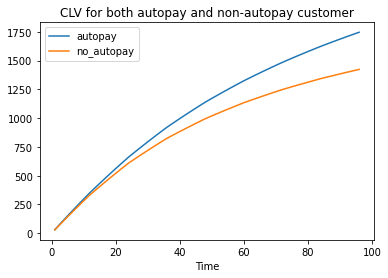

In [73]:
# enter your code here to create a single plot with 2-lines
import matplotlib.pyplot as plt
homealarm.plot(x="Time", y=["autopay", "no_autopay"])
plt.title("CLV for both autopay and non-autopay customer")
plt.show()

### Create a line graph of the retention rate for both autopay and non-autopay customer 

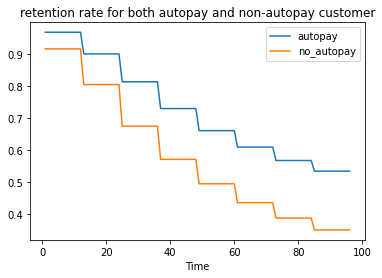

In [74]:
# enter your code here to create a single plot with 2-lines
retention = pd.DataFrame(
    {"Time": time, "autopay": retention_ap, "no_autopay": retention_nap}
)
retention.plot(x="Time", y=["autopay", "no_autopay"])
plt.title("retention rate for both autopay and non-autopay customer")
plt.show()

### Calculate the maximum amount to spend on autopay incentives

In [75]:
max_pay = clv_ap[95] - clv_nap[95] # insert your code here
print(f"Maxium amount to spend on autopay incentives is {max_pay.round(2)}")

Maxium amount to spend on autopay incentives is 322.73


### Suggested marketing actions

Suggest two marketing actions Home Alarm should consider to convert existing customers to autopay who are about to start their second year with Home Alarm. Be specific about incentive amounts you recommend using (if any)

... enter suggested marketing actions here ...

**Suggestions:**

1. Give one-time reward or discounted monthly price for existing customers at the year they start autopay. The incentive amount I recommend using is \$200. The reason for me to include more incentive amount in this approach is that rewards would be more direct and attractive. 

2. Provide additional service in autopay system for the existing customers who switch to autopay. For example, a VIP program where existing customer can accumulate their consumption points and keep a record of order history. The incentive amount I recommend using is \$122.73. The incentive amount would be mostly spend on the application development.